<h2 style="color:lightgreen">Decision Tree: From Scratch</h2>

<h3> Collection of methods that handle different scenarios for dirrent representations of data </h3>

<h4 style="color:lightblue"> #TODO - Launch on huge Datasets </h4>

# Decision Tree Building

## Import libraries

In [45]:
import pandas as pd
import numpy as np
from statistics import mode

<h3 style="color:lightgreen">Entropy methods</h3>
<h4 style="color:lightblue">Free to edit </h4>

<h3 style="color:pink">Inputs</h3>
<h4>Option of entering just dataframe or both dataframe and feature name(s)</h4>
<h5>Pandas Dataframe</h5>
<h5>Feature/s</h5>

<h3 style="color:lightblue">One line implementations of entropy</h3>

In [46]:
def lazy_entropy(dataset,column):
	entropy = abs(sum([(x/sum(list(dataset.iloc[:,column].value_counts())))*np.log2(x/sum(list(dataset.iloc[:,column].value_counts()))) for x in list(dataset.iloc[:,column].value_counts())]))
	return entropy

In [47]:
##Second implementation
def lazy_entropy(dataset,column):
	entropy = abs(sum([(x/sum(list(dataset.iloc[:,column].value_counts())))*np.log2(x/sum(list(dataset.iloc[:,column].value_counts()))) for x in list(dataset.iloc[:,column].value_counts())]))
	return entropy


In [48]:
# Input: Column values of a pandas Dataframe
def entropy_feature(dataset,column):
  unique_values = list(dataset[column].value_counts())
  probs = [x/sum(unique_values) for x in unique_values]
  # [-0.6428571428571429, -0.35714285714285715]
  entropy = sum([prob*np.log2(prob) for prob in probs])
  return abs(entropy)

<h4>Pass in dataset, assumes that last column is the target class </h4>

In [49]:
def entropy(dataset):
  unique_values =  list(dataset.iloc[:,-1].value_counts())
  probs = [x/sum(unique_values) for x in unique_values]
  entropy = sum([prob*np.log2(prob) for prob in probs])
  return abs(entropy)

<h3 style="color:pink">Information Gain Methods </h3>

In [50]:
def info_gain_feature(dataset,feature):
	# Original dataset
	unique_values = list(dataset[feature].value_counts())
	# Names of the features
	unique_index = dataset[feature].value_counts().index.tolist()




	info_gain = 0
	data_entropy = entropy(dataset)
	data_size = dataset.shape[0]

	entropies = []
	# Finds Entropies and returns list of entropy and size
	for unique_feature in unique_index:
		filt = dataset[feature]	== unique_feature
		# Create new dataset according to feature split
		feature_dataset = dataset[filt]	
		# [([entropies,size],[])]
		entropies.append((entropy(feature_dataset),feature_dataset.shape[0]))


	branch_entropy = sum([ data[0] * data[1] for data in entropies])
	info_gain = data_entropy - branch_entropy/data_size
	
	return info_gain

In [51]:
def info_gains_features(dataset,features):
	info_gains = {}
	feature_size = len(features)
	for feature,size in zip(features,range(feature_size)):
		info_gains[feature] = info_gain_feature(dataset,feature)
	return info_gains

<h4 style="color:lightgreen"> Second Implementation </h4>
<p><strong>Returns a dictionary of information gains for each feature. Where key = column index in the table and value = information gain </strong></p>

In [52]:
# Sample return  = {0: 0.24674981977443899, 1: 0.029222565658954647, 2: 0.15183550136234147, 3: 0.048127030408269267}
def info_gains(dataset):
	cols = dataset.shape[1]
	info_gains = {}
	for col in range(cols-1):
		unique_values = list(dataset.iloc[:,col].value_counts())
		unique_index = dataset.iloc[:,col].value_counts().index.tolist()

		info_gain = 0
		data_entropy = entropy(dataset)
		data_size = dataset.shape[0]

		entropies = []

		for unique_feature in unique_index:
			filt = dataset.iloc[:,col] == unique_feature
			feature_dataset = dataset[filt]
			entropies.append((entropy(feature_dataset),feature_dataset.shape[0]))

		branch_entropy = sum([ data[0] * data[1] for data in entropies])
		info_gain = data_entropy - branch_entropy/data_size		

		# info_gains.append((info_gain,col))
		info_gains[col] = info_gain
	return info_gains

<h2 style="color:lightgray">Find Highest Information Gain </h2>

In [53]:
def best_attribute(gains):
	x  = []
	for gain in gains.values():
		x.append(gain)
	m = max(x)
	index = list(gains.keys())[list(gains.values()).index(m)]
	return index

<h2 style="color:lightgreen"> Run Method to see the values of Information Gain</h2>

<h3 style="color:lightblue">Example with Feature Names given </h3>

In [54]:
dataset = pd.read_csv("tennis.csv",header=None,names=["Outlook","Temperature","Humidity","Windy","Play"])
features=["Outlook","Temperature","Humidity","Windy","Play"]
gains = info_gains_features(dataset,features)
print("Feature Column: Information ",gains) # Dictionary
print()
print("Feature Column Index" ,best_attribute(gains))

Feature Column: Information  {'Outlook': 0.24674981977443899, 'Temperature': 0.029222565658954647, 'Humidity': 0.15183550136234147, 'Windy': 0.048127030408269267, 'Play': 0.94028595867063092}

Feature Column Index Play


<h3 style="color:lightgreen">Example with only dataset given </h3>

In [55]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("tennis.csv",header=None,names=["Outlook","Temperature","Humidity","Windy","Play"])
gains = info_gains(dataset)
print("Feature Column: Information ",gains) # Dictionary
print()
print("Feature Column Index" ,best_attribute(gains))

Feature Column: Information  {0: 0.24674981977443899, 1: 0.029222565658954647, 2: 0.15183550136234147, 3: 0.048127030408269267}

Feature Column Index 0


<h2 style="color:pink"> ID3 ALGORITHM</h2>
<p><strong>ID3 is an algorithm that is mostly used to generate a decision tree , invented by <i>Ross Quinlan</i></strong></p>

In [56]:
def ID3_features(sub_dataset,dataset,features,parent_node_target=None):
	#If target values have the same value
	if len(np.unique(sub_dataset.iloc[:,-1])) <=1 :
		return np.unique(sub_dataset.iloc[:,-1])[0]
	#If sub_dataset is empty	
	elif len(sub_dataset) == 0:
		return parent_node_target

	#If feature list is empty
	elif len(features) == 0:
		target_dict = sub_dataset.iloc[:,-1].value_counts().to_dict()
		return best_attribute(target_dict)
	else:
		parent_node_dict = sub_dataset.iloc[:,-1].value_counts().to_dict()
		parent_node_target = best_attribute(parent_node_dict)
		gains = info_gains_features(sub_dataset,features)
		best_feature = best_attribute(gains)

		tree = {best_feature:{}}


		features.remove(best_feature)

		# Grow a branch under the root
		feature_values = sub_dataset[best_feature].value_counts().index.tolist()
		for feature_value in feature_values:
			filt = sub_dataset[best_feature] == feature_value
			sub = sub_dataset[filt]
			subtree = ID3_features(sub,dataset,features,parent_node_target)

			tree[best_feature][feature_value] = subtree

		return (tree)

<p> <strong>Incase you don't have a list of features </strong></p>

In [57]:
def ID3(sub_dataset,dataset):
	features = list(dataset.columns)
	features.remove(features[-1])
	return ID3_features(sub_dataset,dataset,features)

<h3 style="color:lightgreen">Split the dataset into training and testing</h3>
<p> Advisable to not create validating data, as we won't be pruning</p>

In [58]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("tennis.csv",header=None,names=["Outlook","Temperature","Humidity","Windy","Play"])
#features=["Outlook","Temperature","Humidity","Windy"]
split = len(dataset) * 50//100
train_data = dataset.iloc[:split]
test_data = dataset.iloc[split:]



<h2 style="color:lightgreen"> Building a Model</h2> 

In [59]:
model = ID3(train_data,train_data)
print(model)

{'Outlook': {'Rainy': {'Windy': {'Weak': 'Yes', 'Strong': 'No'}}, 'Sunny': 'No', 'Overcast': 'Yes'}}


<h2 style="color:salmon"> Accuracy and Prediction analysis </h2>

<p> Hold on to your hard hats</p>
<h3 style="color:salmon">Install libraries and modules</h3>

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from statistics import mode
from nested_lookup import nested_lookup


<h4 style="color:salmon"> Converts a list of yes/no values to 1's and 0's </h4>


In [61]:
def convert_first(class_list):
	class_dict = {"Yes":1,"No":0}
	class_list = [class_dict[item] for item in class_list]
	return class_list

def convert(class_list):
	class_unique = np.unique(class_list)
	class_dict = {}
	for index in range(len(class_unique)):
		class_dict[class_unique[index]] = index

	class_list =  [class_dict[item] for item in class_list]
	return class_list



<h4 style="color:salmon"> Predict the class given the feature values </h4>
<img src="predict.png"> 

In [62]:
def predict(tree,features):

	for feature in features:
		new_tree = nested_lookup(feature,tree)
		if len(new_tree) == 0:
			continue
		else:
			tree = new_tree
	return tree



def predict_dataset(model,test_data):
	class_list = []
	for i in range(len(test_data)):
		sample = list(test_data.iloc[i,:-1])
		class_list.append(predict(model,sample)[0])
	return class_list

<h3 style="color:salmon">Calculations</h3>
<img src="f_measure.png"/>
<img src="precision.png"/>
<img src="recall.png"/>
<img src="accuracy.png"/>

In [63]:
#Accuracy
#Assumes cost
def accuracy(TP,TN,FP,FN):
	numerator = TP + TN
	denominator = TP + TN + FP + FN
	return numerator/denominator
	

# When it actually says, i.e real data
#how often does it predict yes
def recall(TP,FN):
  return TP/(TP+FN)


#When it predicts yes , how often
def precision(TP,FP):
	return TP/(TP+FP)




def f_measure(recall,precision):
	numerator = 2* recall * precision
	denominator = recall + precision
	return numerator / denominator



<h3 style="color:salmon">Confusion Matrix </h3>
<img src="template.png"/>


In [64]:
def prediction(test_data,model):

	actual = list(test_data.iloc[:,-1])
	predicted = predict_dataset(model,test_data)

	actual_n = convert(actual)
	predicted_n = convert(predicted)


	data = {"y_act":actual_n,"y_pred":predicted_n}
	df = pd.DataFrame(data,columns = ["y_act","y_pred"])
	conf_matrix = pd.crosstab(df["y_act"],df["y_pred"],rownames=["Actual"],colnames=["Predicted"],margins=True,margins_name="Total")
	
	TP = conf_matrix[1][1]
	TN = conf_matrix[0][0]
	FP = conf_matrix[1][0]
	FN = conf_matrix[0][1]
	acc = accuracy(TP,TN,FP,FN)
	recall_data = recall(TP,FN)
	precision_data = precision(TP,FP)
	f_measure_data = f_measure(recall_data,precision_data)
	return [{"Accuracy":acc, "Recall":recall_data,"Precision":precision_data,"F Measure":f_measure_data},conf_matrix]


In [65]:
def dict_print(dic):
	for k,v in dic.items():
		print(k," : " ,v)

def show_heatmap(conf_matrix):
	sn.heatmap(conf_matrix,annot=True)
	plt.title("Confusion Matrix: Are you convinced yet ?")
	plt.show()


<h2 style="color:lightgreen"> Decision Tree Method </h2>

In [66]:
def proof(conf_matrix):
	ans = input("Are you convinced that it's right:  [y/n]:  ")
	if ans == "n" or ans == "N":
		show_heatmap(conf_matrix)
	else:
		print("Great !!")


In [69]:
def decision_tree(train_data,test_data):
	# model=  ID3_features(train_data,train_data,features)
	model = ID3(train_data,train_data)
	print("Tree: ",model)
	print("Prediction results ...")
	prediction_data = prediction(test_data,model)
	dict_print(prediction_data[0])
	proof(prediction_data[1])

Tree:  {'Outlook': {'Rainy': {'Windy': {'Weak': 'Yes', 'Strong': 'No'}}, 'Sunny': 'No', 'Overcast': 'Yes'}}
Prediction results ...
Accuracy  :  0.714285714286
Recall  :  0.6
Precision  :  1.0
F Measure  :  0.75


Are you convinced that it's right:  [y/n]:   n


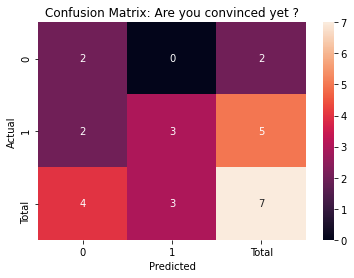

In [70]:
decision_tree(train_data,test_data)